In [72]:
import pandas as pd

# Load the dataset
file_path = 'TMDB_movie_dataset_v11.csv' 
movies = pd.read_csv(file_path)
print(movies.shape)

#Handle duplicate rows
if movies.duplicated().sum() > 0:
    print(f"\nFound {movies.duplicated().sum()} duplicate rows. Removing them.")
    movies = movies.drop_duplicates()

# Select only columns needed for this task
columns = ["title","popularity", "vote_average", "runtime", "genres", "original_language", "status"]
movies_subset = movies[columns]
    
# Remove rows with missing values 
movies_cleaned = movies_subset.dropna()
movies_cleaned.shape

(1137709, 24)

Found 368 duplicate rows. Removing them.


(681435, 7)

In [74]:
# Filter the rows where status is "Released"
movies_cleaned = movies_cleaned.loc[movies_cleaned['status'] == 'Released']

# Check the new shape of the cleaned dataset
print(movies_cleaned.shape)

(662453, 7)


In [76]:
# Split the 'genres' column by commas and flatten the list
all_genres = movies_cleaned['genres'].str.split(',').explode().str.strip()

# Get unique genres
unique_genres = all_genres.unique()

# Count the number of unique genre categories
unique_genres_count = len(unique_genres)

# Display the unique genre categories and the total count
print(f"Unique genres: {unique_genres}")
print(f"Total number of unique genres: {unique_genres_count}")


Unique genres: ['Action' 'Science Fiction' 'Adventure' 'Drama' 'Crime' 'Thriller'
 'Fantasy' 'Comedy' 'Romance' 'Western' 'Mystery' 'War' 'Animation'
 'Family' 'Horror' 'Music' 'History' 'TV Movie' 'Documentary']
Total number of unique genres: 19


In [77]:
# Summary statistics for the 'popularity' column
popularity_stats = movies_cleaned['popularity'].describe()

print(popularity_stats)


count    662453.000000
mean          1.708422
std           9.806713
min           0.000000
25%           0.600000
50%           0.601000
75%           1.296000
max        2994.357000
Name: popularity, dtype: float64


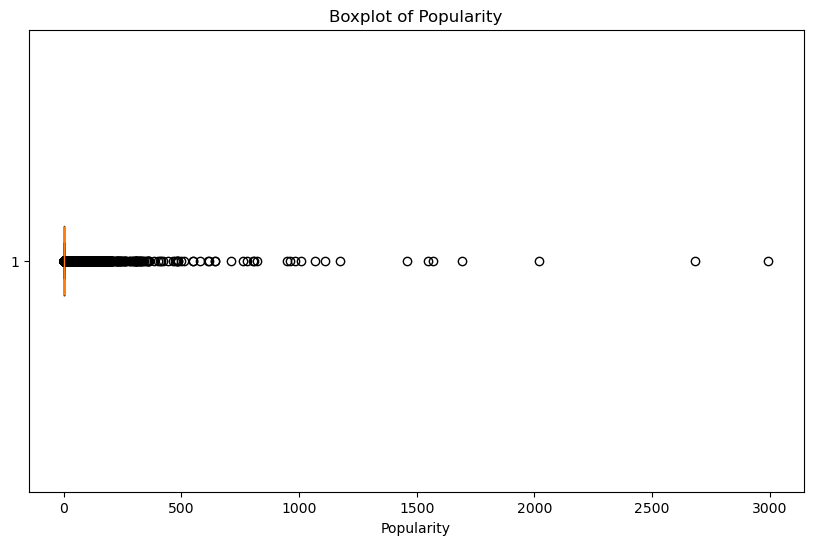

In [80]:
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(movies_cleaned['popularity'], vert=False)
plt.title('Boxplot of Popularity')
plt.xlabel('Popularity')
plt.show()


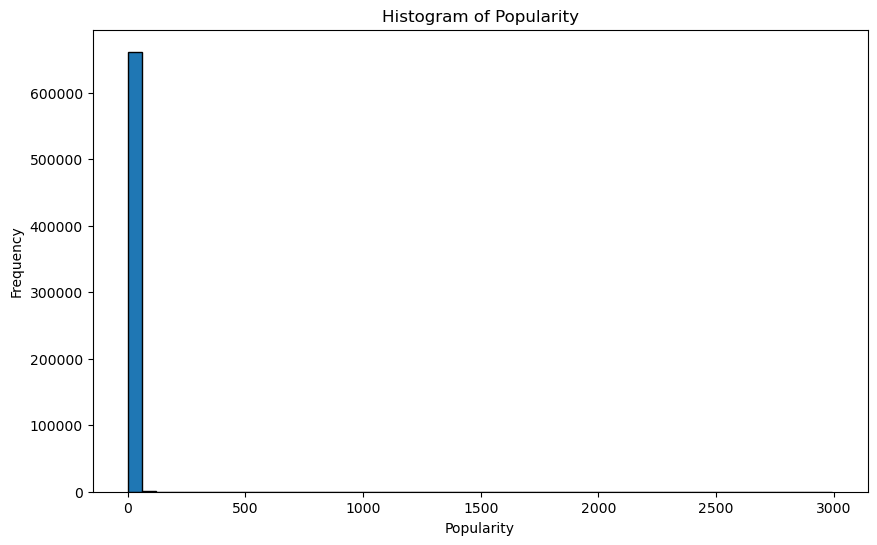

In [82]:
# Histogram of 'popularity'
plt.figure(figsize=(10, 6))
plt.hist(movies_cleaned['popularity'], bins=50, edgecolor='black')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


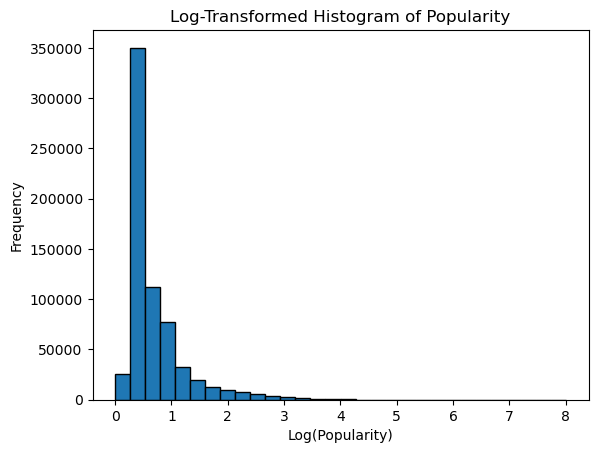

In [86]:
import numpy as np
movies_cleaned['log_popularity'] = np.log1p(movies_cleaned['popularity'])
plt.hist(movies_cleaned['log_popularity'], bins=30, edgecolor='black')
plt.title('Log-Transformed Histogram of Popularity')
plt.xlabel('Log(Popularity)')
plt.ylabel('Frequency')
plt.show()


In [88]:
# Sort the dataset by 'popularity' in descending order
sorted_popularity = movies_cleaned.sort_values(by='popularity', ascending=False)

# Display the top 10 rows with the highest popularity
print(sorted_popularity.head(1000))


                                                    title  popularity  \
3873                                          Blue Beetle    2994.357   
5048                                         Gran Turismo    2680.593   
51926   A Female Boss with Big Tits and Her Cherry Boy...    2020.286   
7922                                           The Nun II    1692.778   
2129                                    Meg 2: The Trench    1567.273   
...                                                   ...         ...   
3971                      Wrong Turn 4: Bloody Beginnings      47.392   
302                           Kingsman: The Golden Circle      47.359   
255006                                     Mom's Friend 4      47.314   
34582                                       The Astronaut      47.307   
1055                                       Need for Speed      47.306   

        vote_average  runtime                              genres  \
3873           7.139      128  Action, Science Fiction

-0.44400000000000006
2.34
(662453, 8)
(584944, 8)


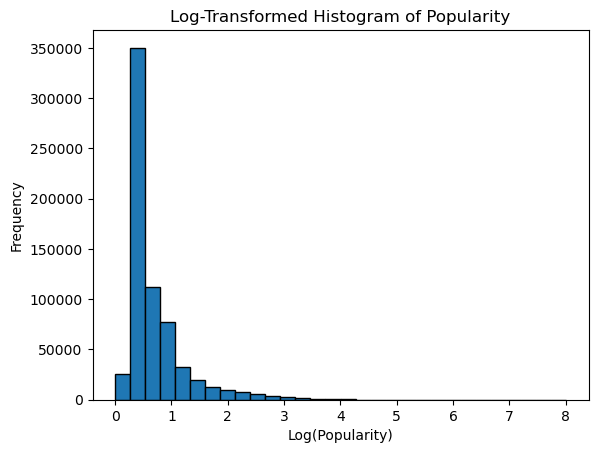

In [110]:
# Remove outliers using IQR
Q1 = movies_cleaned['popularity'].quantile(0.25)
Q3 = movies_cleaned['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)
print(movies_cleaned.shape)

# Filter data to remove outliers
movies_without_outliers = movies_cleaned[(movies_cleaned['popularity'] >= lower_bound) & 
                                         (movies_cleaned['popularity'] <= upper_bound)]
print(movies_without_outliers.shape)
movies_without_outliers.describe()



count    584944.000000
mean         48.574824
std          61.694416
min           0.000000
25%           4.000000
50%          33.000000
75%          87.000000
max       14400.000000
Name: runtime, dtype: float64
Skewness: 61.43299120229767
Variance: 3806.201016314216


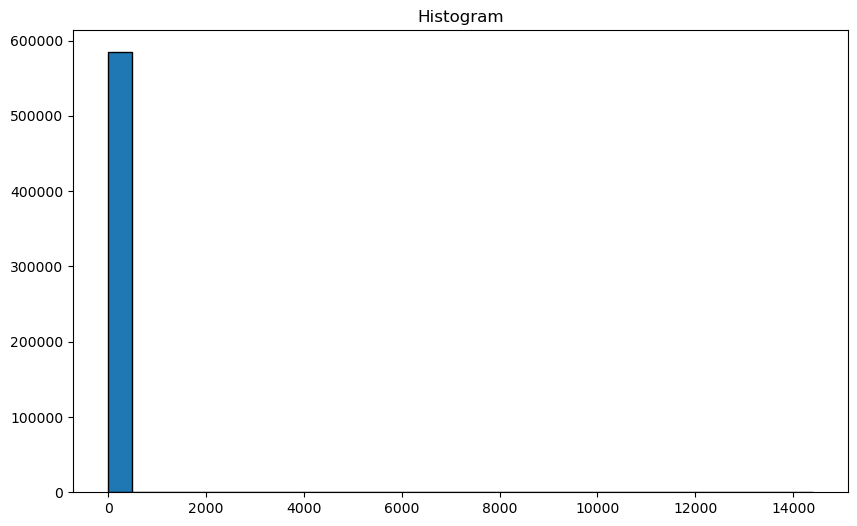

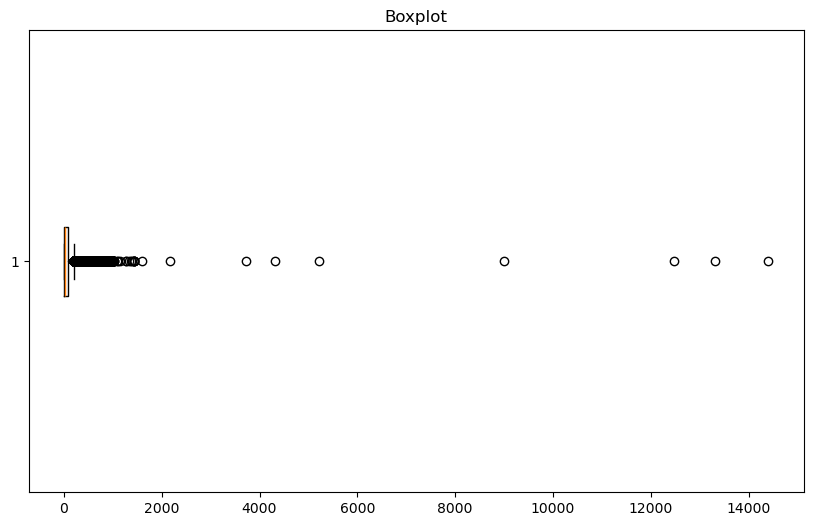

                                                    title  popularity  \
269928                   El amante de las películas mudas       0.600   
263346                                   El Día Del Lirón       0.600   
836941           Four Winds Island Part Seven Hell's Gate       0.600   
263348  DÉTOX : infiltration chez les imposteurs de la...       0.633   
263351                                 Struggle from 2012       0.600   
...                                                   ...         ...   
266450                                Je dis donc je suis       0.600   
602652                                           Monamour       0.000   
833746                     Schicken Sie mir einen Dollar!       0.600   
266458                               Σε ικετεύω αγάπη μου       0.961   
266462  Hip-Hop @ 50: Rhythms, Rhymes & Reflections – ...       0.916   

        vote_average  runtime                 genres original_language  \
269928           5.0        0                  Dr

In [144]:
def eda_report(column):
    # Summary Stats
    print(column.describe())
    
    # Skewness
    print(f'Skewness: {column.skew()}')
    
    # Variance
    print(f'Variance: {column.var()}')
    
    # Plot Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(column, bins=30, edgecolor='black')
    plt.title('Histogram')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(column, vert=False)
    plt.title('Boxplot')
    plt.show()
    
    # Sort in descending order
    sorted_ = movies_without_outliers.sort_values(by='runtime')

    # Display the top 10 rows 
    print(sorted_.head(1000))

# Run EDA 
eda_report(movies_without_outliers['runtime'])


In [146]:
# Filter out movies with runtime equal to 0
movies_without_outliers = movies_without_outliers[movies_without_outliers['runtime'] != 0]

# Verify that movies with runtime 0 have been removed
print(f"Number of movies with runtime 0: {sum(movies_without_outliers['runtime'] == 0)}")
print(movies_without_outliers.shape)


Number of movies with runtime 0: 0
(460981, 8)


In [148]:
# Check unique values in the 'original_language' column
unique_languages = movies_without_outliers['original_language'].unique()
print(f"Unique Languages: {unique_languages}")

# Count the number of unique languages
num_languages = movies_without_outliers['original_language'].nunique()
print(f"Number of Unique Languages: {num_languages}")

# Get the frequency of each language
language_counts = movies_without_outliers['original_language'].value_counts()
print(language_counts)


Unique Languages: ['en' 'ja' 'fr' 'es' 'pt' 'it' 'ru' 'ar' 'tr' 'hu' 'no' 'de' 'pl' 'sv'
 'xx' 'bn' 'da' 'te' 'zh' 'el' 'uk' 'hi' 'tl' 'fa' 'cs' 'nl' 'pa' 'fi'
 'bo' 'he' 'wo' 'sl' 'ko' 'sh' 'is' 'ro' 'hy' 'cn' 'ca' 'th' 'sq' 'dz'
 'ml' 'gu' 'bg' 'sk' 'ur' 'eu' 'id' 'sr' 'lt' 'sw' 'hr' 'et' 'am' 'lv'
 'ta' 'ne' 'bs' 'kn' 'ka' 'la' 'kk' 'nb' 'ak' 'vi' 'mr' 'gl' 'mk' 'ps'
 'ms' 'ln' 'ay' 'si' 'yi' 'mo' 'ku' 'rw' 'mn' 'ky' 'as' 'lo' 'az' 'zu'
 'ab' 'kl' 'km' 'jv' 'mi' 'bm' 'fo' 'af' 'li' 'sn' 'cy' 'my' 'tg' 'xh'
 'ks' 'lb' 'iu' 'ht' 'ff' 'ga' 'ha' 'sm' 'rm' 'tk' 'fy' 'mt' 'se' 'qu'
 'or' 'ny' 'eo' 'gd' 'so' 'be' 'om' 'uz' 'mg' 'cr' 'mh' 'st' 'nn' 'tw'
 'os' 'nv' 'ig' 'yo' 'tt' 'sa' 'kw' 'dv' 'sg' 'nd' 'bi' 'sc' 'gn' 'sd'
 'ie' 'ug' 'co' 'lg' 'to' 'ti' 'br' 'su' 'kv' 'kj' 'kg' 'tn' 'ia' 'ce'
 'ba' 'aa' 'fj' 'oc' 'hz' 'gv' 'ii' 'ts' 'ty' 'ki' 'ss' 'rn' 'ch']
Number of Unique Languages: 167
original_language
en    244758
ja     23805
es     22766
fr     22433
de     17486
       ...  
aa    

In [150]:
# Get the top 10 most frequent languages
top_10_languages = movies_without_outliers['original_language'].value_counts().head(10).index

# Filter the dataset to keep only rows with top 10 languages
movies_top_10_languages = movies_without_outliers[movies_without_outliers['original_language'].isin(top_10_languages)]

# Display the result
print(movies_top_10_languages['original_language'].value_counts())
print(movies_top_10_languages.shape)


original_language
en    244758
ja     23805
es     22766
fr     22433
de     17486
ru     13942
pt     10784
zh      9205
it      8021
ko      5406
Name: count, dtype: int64
(378606, 8)


In [152]:
final_movies_ = movies_top_10_languages.drop(columns=['log_popularity'])
print(final_movies_.shape)


(378606, 7)


In [160]:
# Calculate the percentage of zero values for the 'runtime' column
zero_values_percentage = (final_movies_['vote_average'] == 0).mean() * 100

# Display the result
print(f"Percentage of zero values in 'vote_average': {zero_values_percentage:.2f}%")


Percentage of zero values in 'vote_average': 59.57%


In [174]:
final_movies_ = final_movies_.drop(columns=['status'])

In [ ]:
final_movies_ = final_movies_.drop(columns=['vote_average]')

In [176]:
print(final_movies_.columns)

Index(['title', 'popularity', 'runtime', 'genres', 'original_language'], dtype='object')


In [178]:
# Save the cleaned dataset to a new CSV file
output_file_path = 'final_movies_.csv'
final_movies_.to_csv(output_file_path, index=False)
